# Decision Tree (Karar Ağacı)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Eksik Veriler

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df['species'].unique

<bound method Series.unique of 0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object>

In [9]:
df['island'].unique

<bound method Series.unique of 0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object>

In [10]:
df['sex'].unique

<bound method Series.unique of 0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 334, dtype: object>

In [11]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df = df[df['sex'] != '.']

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='species', ylabel='count'>

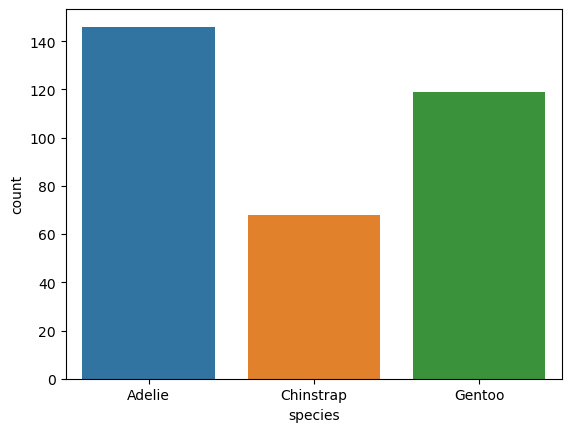

In [14]:
sns.countplot(x='species', data=df)

<Axes: xlabel='island', ylabel='count'>

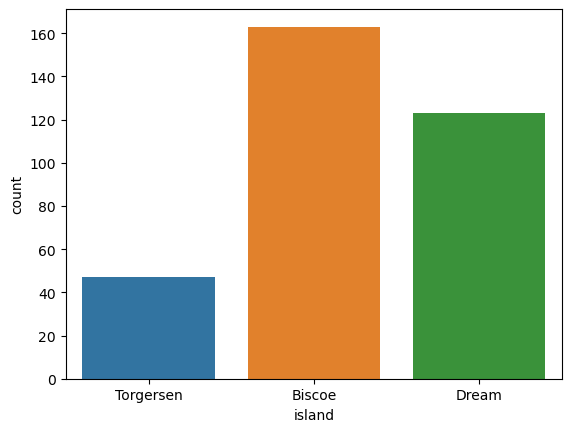

In [15]:
sns.countplot(x='island', data=df)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

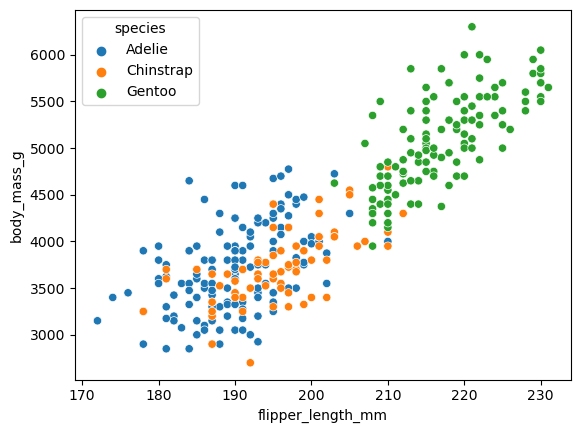

In [16]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species')


<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

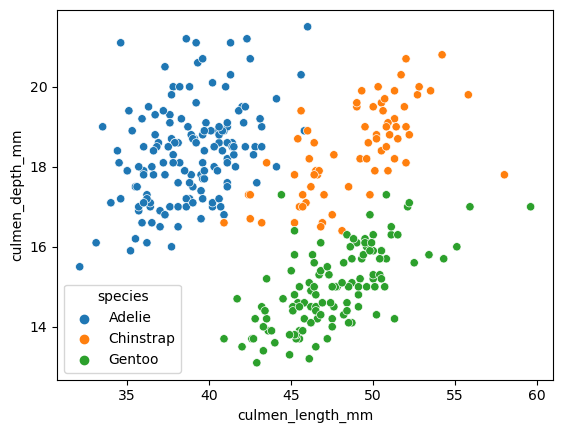

In [17]:
sns.scatterplot(
    x='culmen_length_mm',
    y='culmen_depth_mm',
    data=df,
    hue='species'
)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

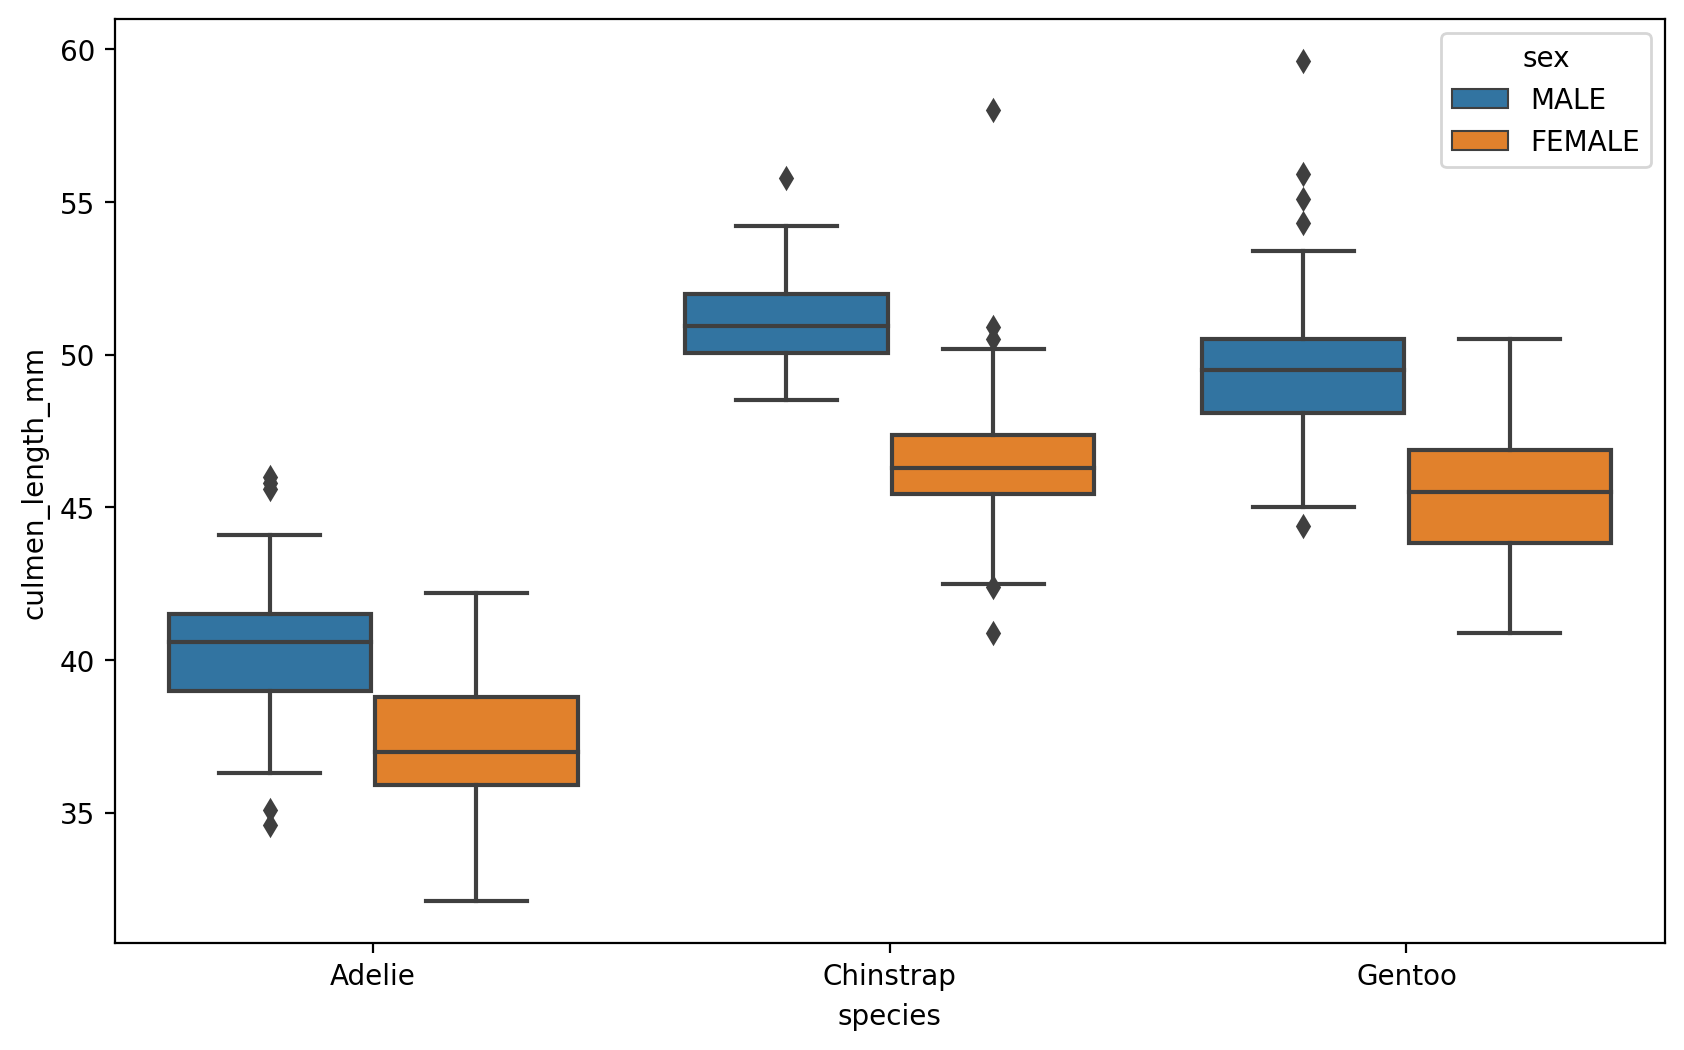

In [18]:
plt.figure(figsize=(10,6), dpi=200)
sns.boxplot(
    x='species',
    y='culmen_length_mm',
    data=df,
    hue='sex'
)

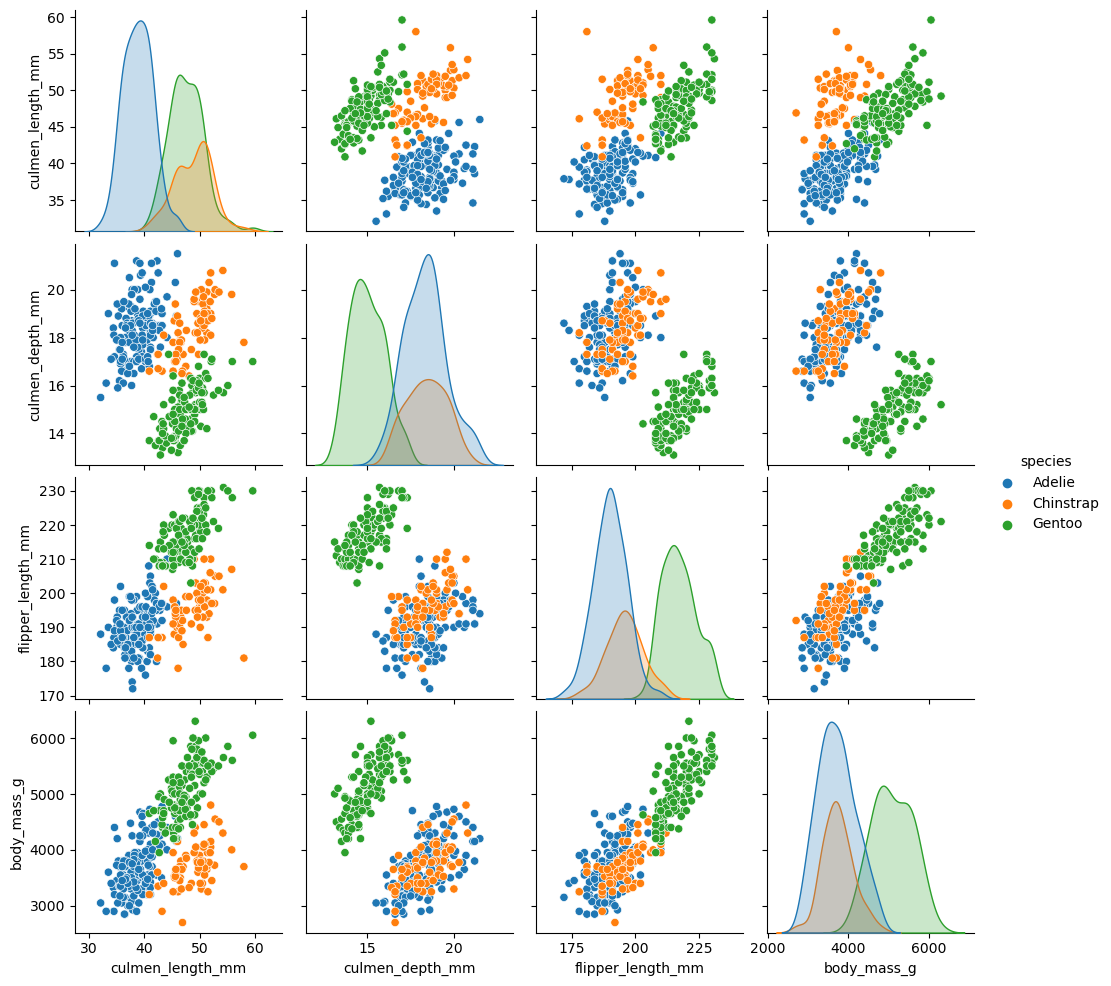

In [ ]:
sns.pairplot(data=df, hue='species')

In [ ]:
df.corr()

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_46434/3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

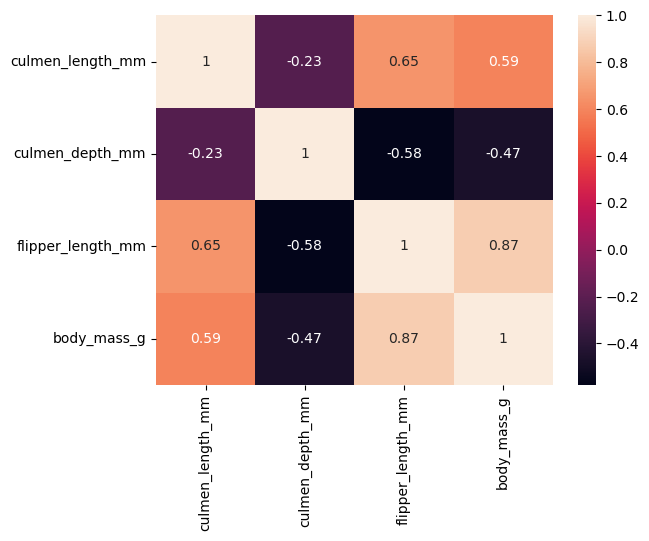

In [21]:
sns.heatmap(df.corr(), annot = True)

## Train Test Split

In [22]:
pd.get_dummies(df.drop('species', axis = 1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


### Aynı İşlevi Yapan Komutlar
* get dummies
* label encoder
* one hot encoder

In [23]:
X = pd.get_dummies(df.drop('species', axis = 1),drop_first=True)
y = df['species']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

## Karar Verme Ağacı Modeli

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier(random_state=9)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

In [29]:
pengu_pred = model.predict(X_test)

## Değerlendirme

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [31]:
confusion_matrix(y_test, pengu_pred)

array([[43,  2,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

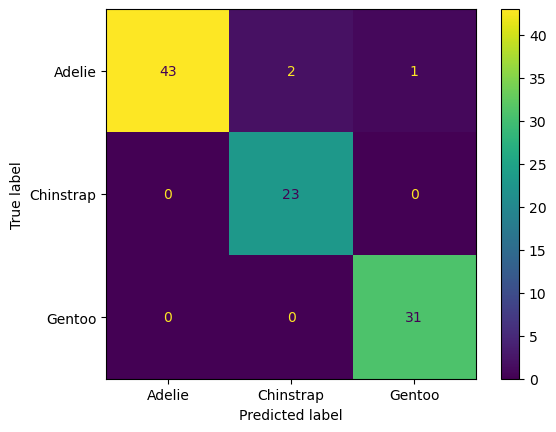

In [32]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

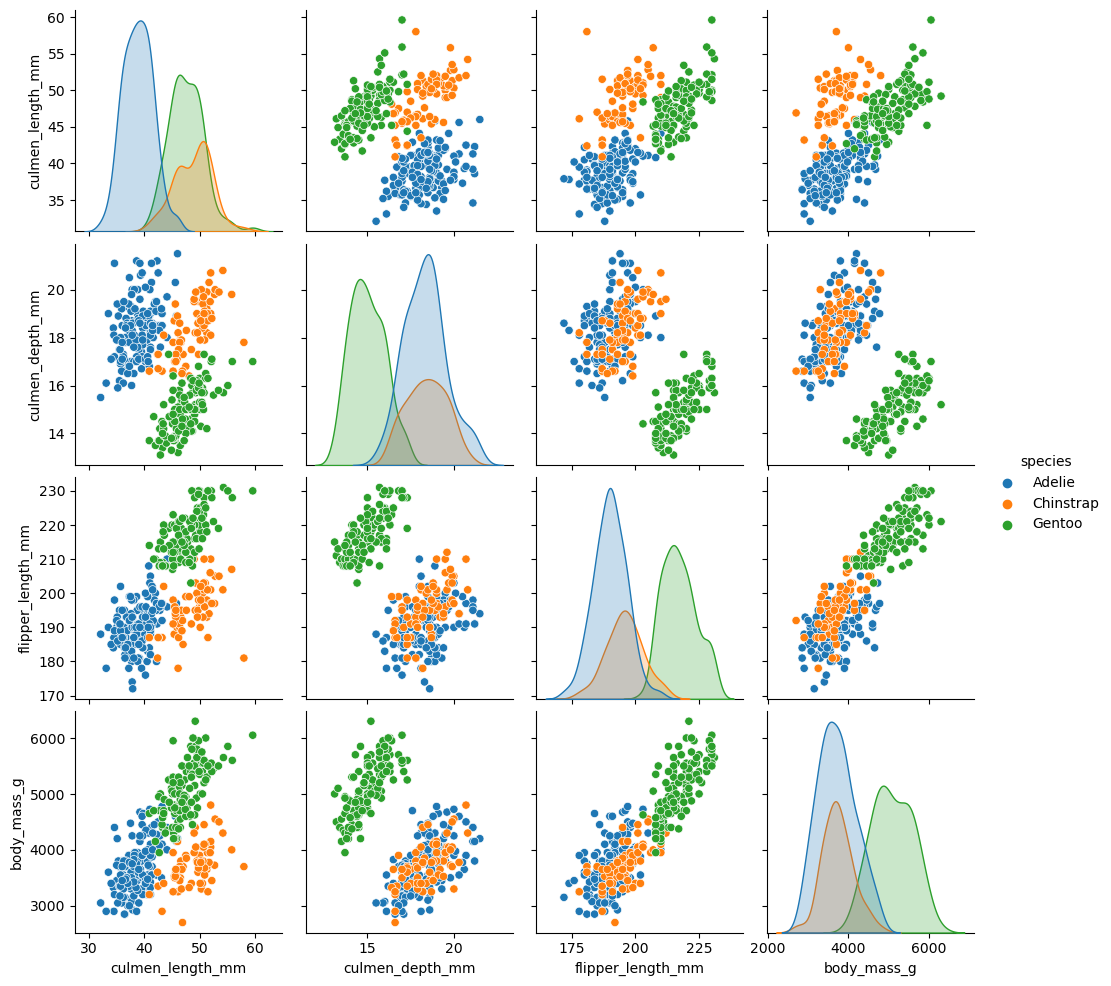

In [ ]:
sns.pairplot(data=df, hue='species')

In [34]:
 print(classification_report(y_test, pengu_pred))
    #Gayet başaraılı bir model olduğunu söyleyebilriz.

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



In [35]:
model.feature_importances_

array([0.35823501, 0.04125461, 0.55096018, 0.        , 0.02930107,
       0.        , 0.02024913])

In [36]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,
            columns=['Özellik Katsayıları'])

,Özellik Katsayıları
culmen_length_mm,0.358235
culmen_depth_mm,0.041255
flipper_length_mm,0.550960
body_mass_g,0.000000
island_Dream,0.029301
island_Torgersen,0.000000
sex_MALE,0.020249


## Karar Verme Ağacı Nedir

In [37]:
from sklearn.tree import plot_tree

[Text(0.6911764705882353, 0.9166666666666666, 'X[2] <= 206.5\ngini = 0.636\nsamples = 233\nvalue = [100, 45, 88]'),
 Text(0.5, 0.75, 'X[0] <= 43.35\ngini = 0.425\nsamples = 143\nvalue = [100, 42, 1]'),
 Text(0.29411764705882354, 0.5833333333333334, 'X[0] <= 42.4\ngini = 0.039\nsamples = 100\nvalue = [98, 2, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'X[1] <= 16.65\ngini = 0.021\nsamples = 94\nvalue = [93, 1, 0]'),
 Text(0.11764705882352941, 0.25, 'X[0] <= 39.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 88\nvalue = [88, 0, 0]'),
 Text(0.4117647058823529, 0.4166666666666667, 'X[6] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.35294117647058826, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4705882

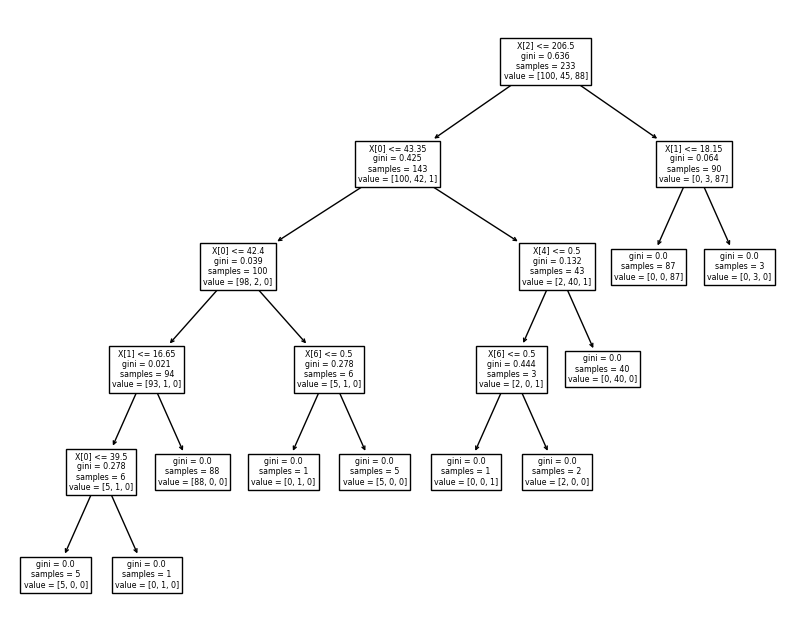

In [38]:
plt.figure(figsize=(10,8))
plot_tree(model)

[Text(0.6911764705882353, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.636\nsamples = 233\nvalue = [100, 45, 88]'),
 Text(0.5, 0.75, 'culmen_length_mm <= 43.35\ngini = 0.425\nsamples = 143\nvalue = [100, 42, 1]'),
 Text(0.29411764705882354, 0.5833333333333334, 'culmen_length_mm <= 42.4\ngini = 0.039\nsamples = 100\nvalue = [98, 2, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'culmen_depth_mm <= 16.65\ngini = 0.021\nsamples = 94\nvalue = [93, 1, 0]'),
 Text(0.11764705882352941, 0.25, 'culmen_length_mm <= 39.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 88\nvalue = [88, 0, 0]'),
 Text(0.4117647058823529, 0.4166666666666667, 'sex_MALE <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.35294117647058826, 0.25

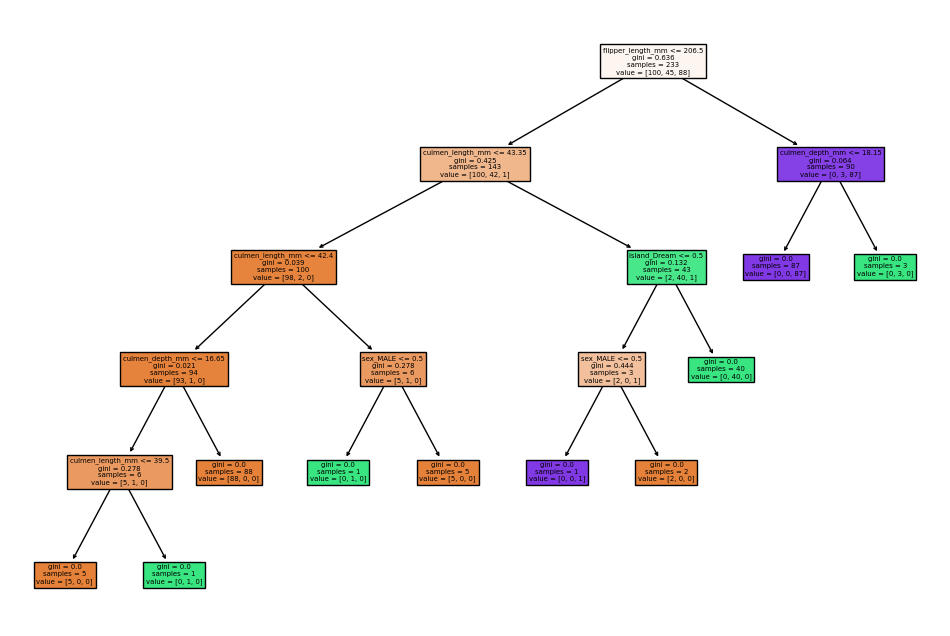

In [39]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns)

In [40]:
def model_sonuc(model):
    pengu_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(y_test, pengu_pred), '\n')
    plt.figure(figsize=(12, 8), dpi=200)
    plot_tree(model, filled=True, feature_names=X.columns)


In [41]:
az_agac = DecisionTreeClassifier(max_depth=2)
az_agac.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100
 



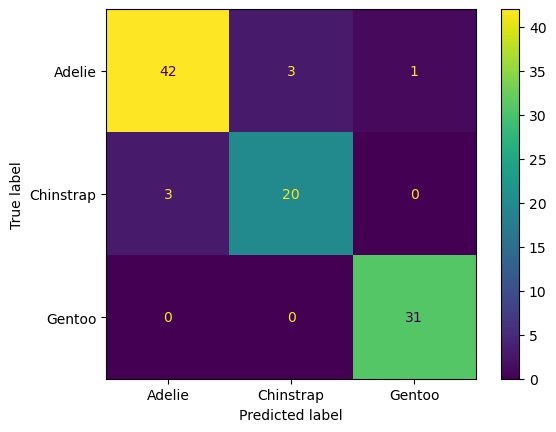

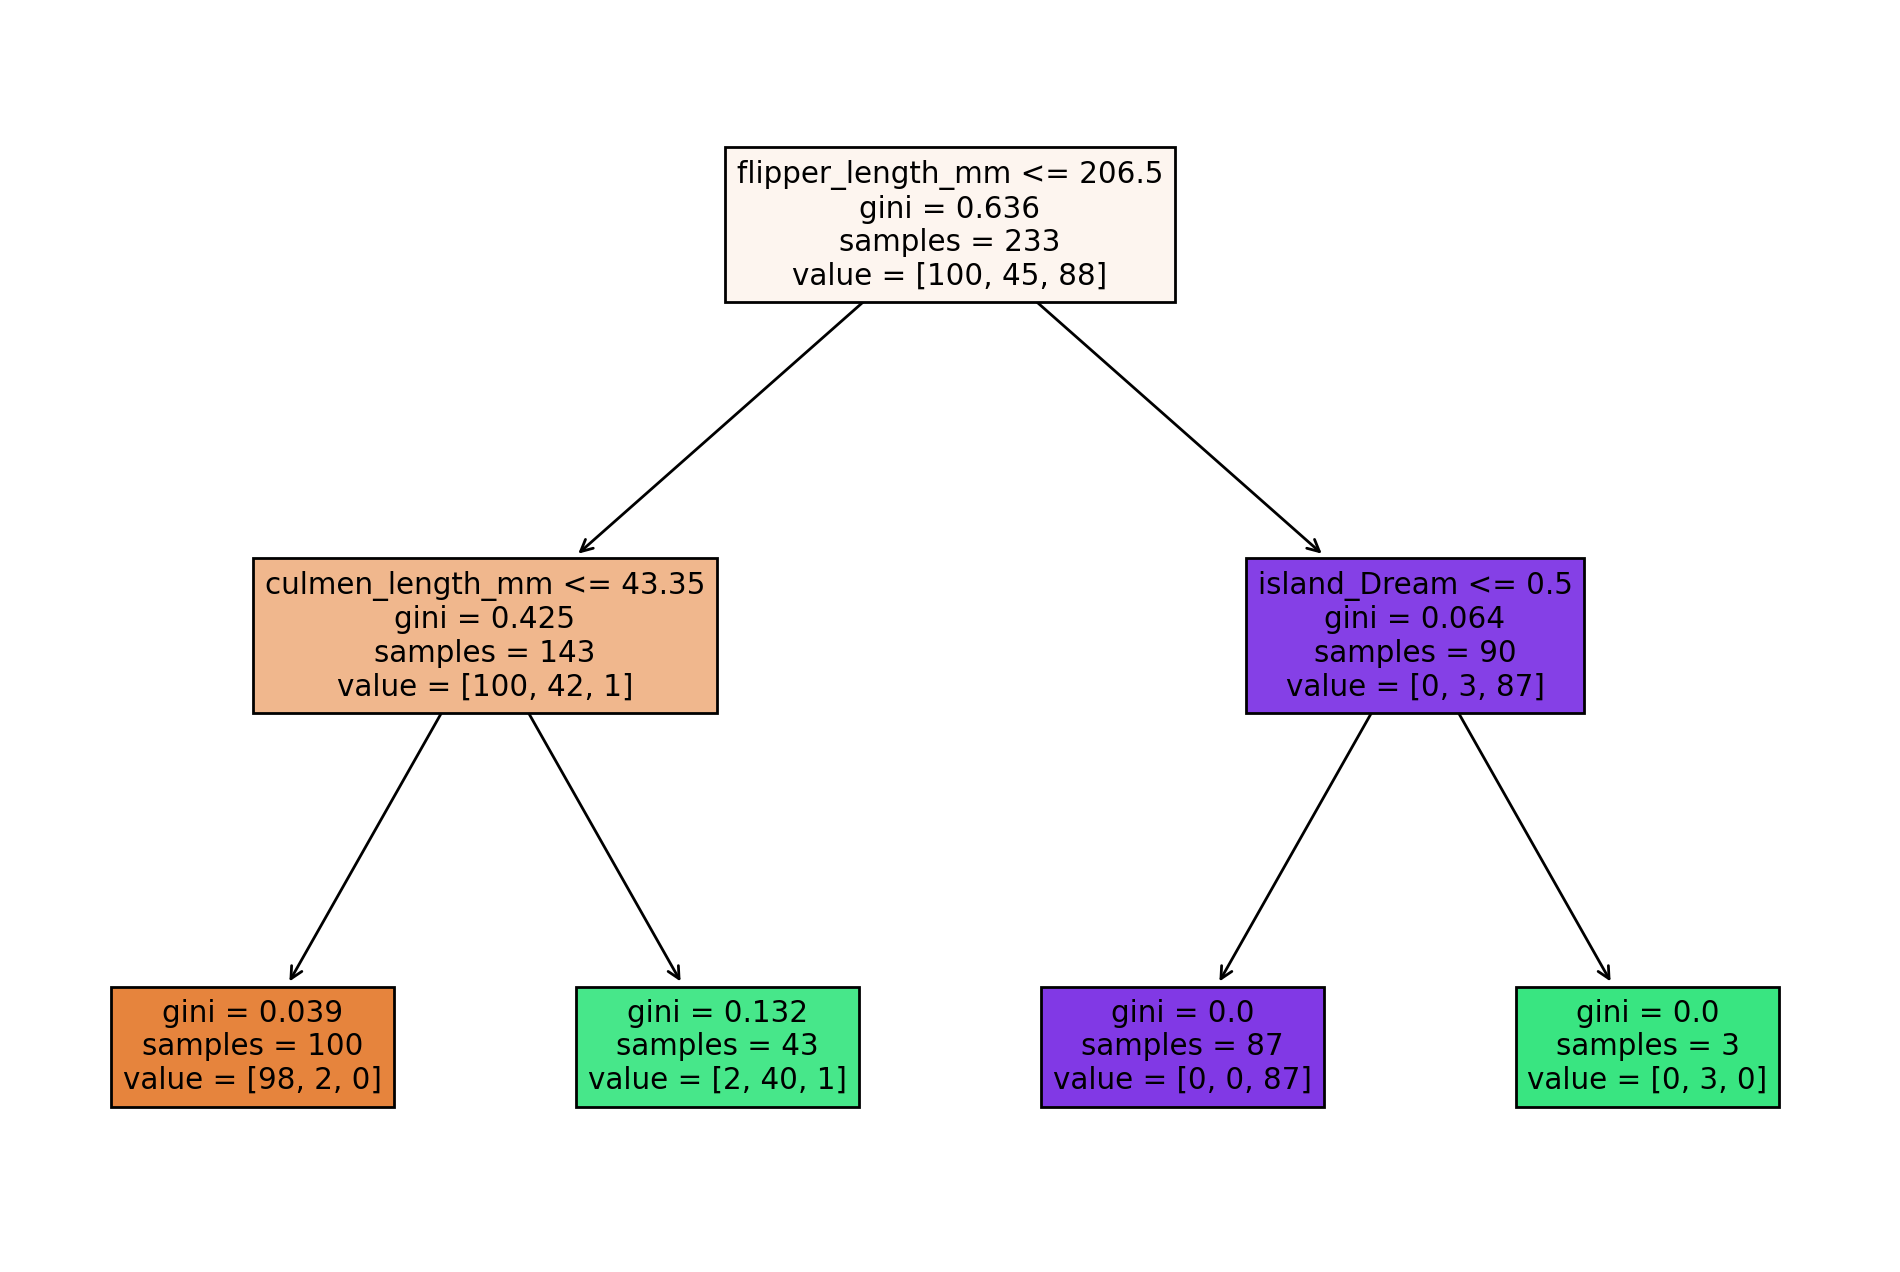

In [42]:
model_sonuc(az_agac)

## Az Yaprak

In [45]:
az_yaprak = DecisionTreeClassifier(max_leaf_nodes=5)
az_yaprak.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        46
   Chinstrap       0.91      0.87      0.89        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100
 



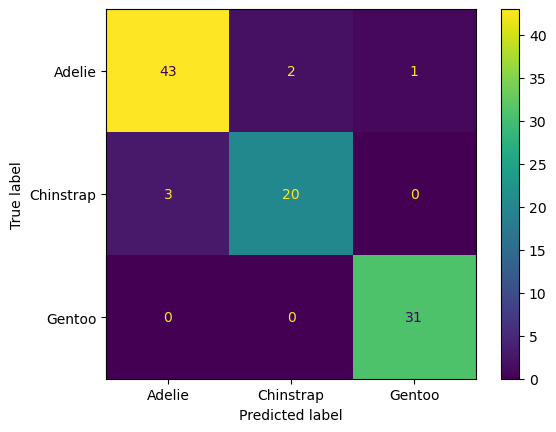

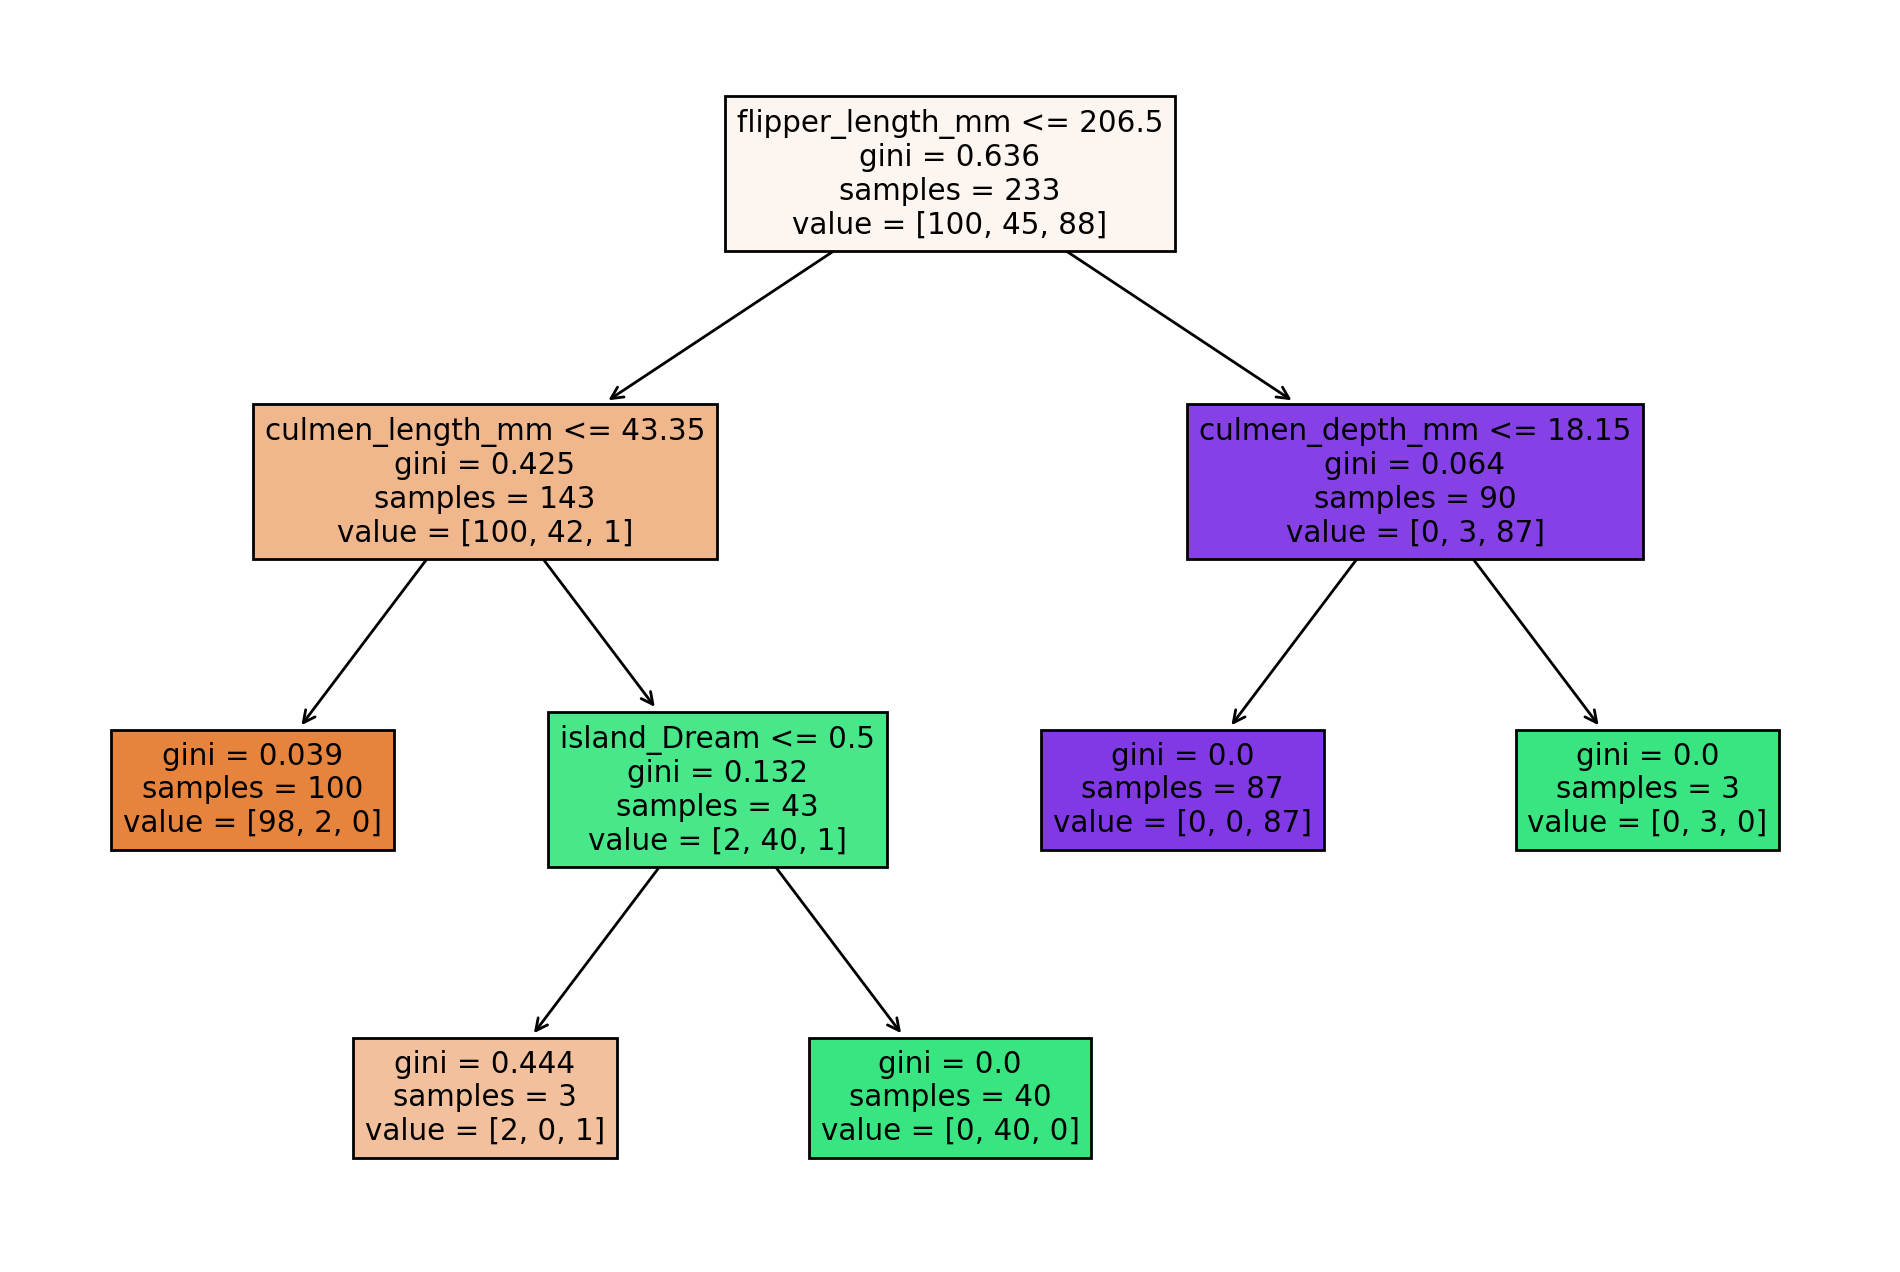

In [48]:
model_sonuc(az_yaprak)

## Optimizyason

In [50]:
entropi = DecisionTreeClassifier(criterion='entropy')
entropi.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100
 



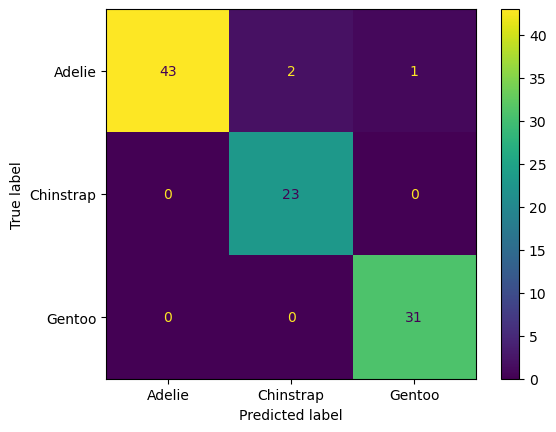

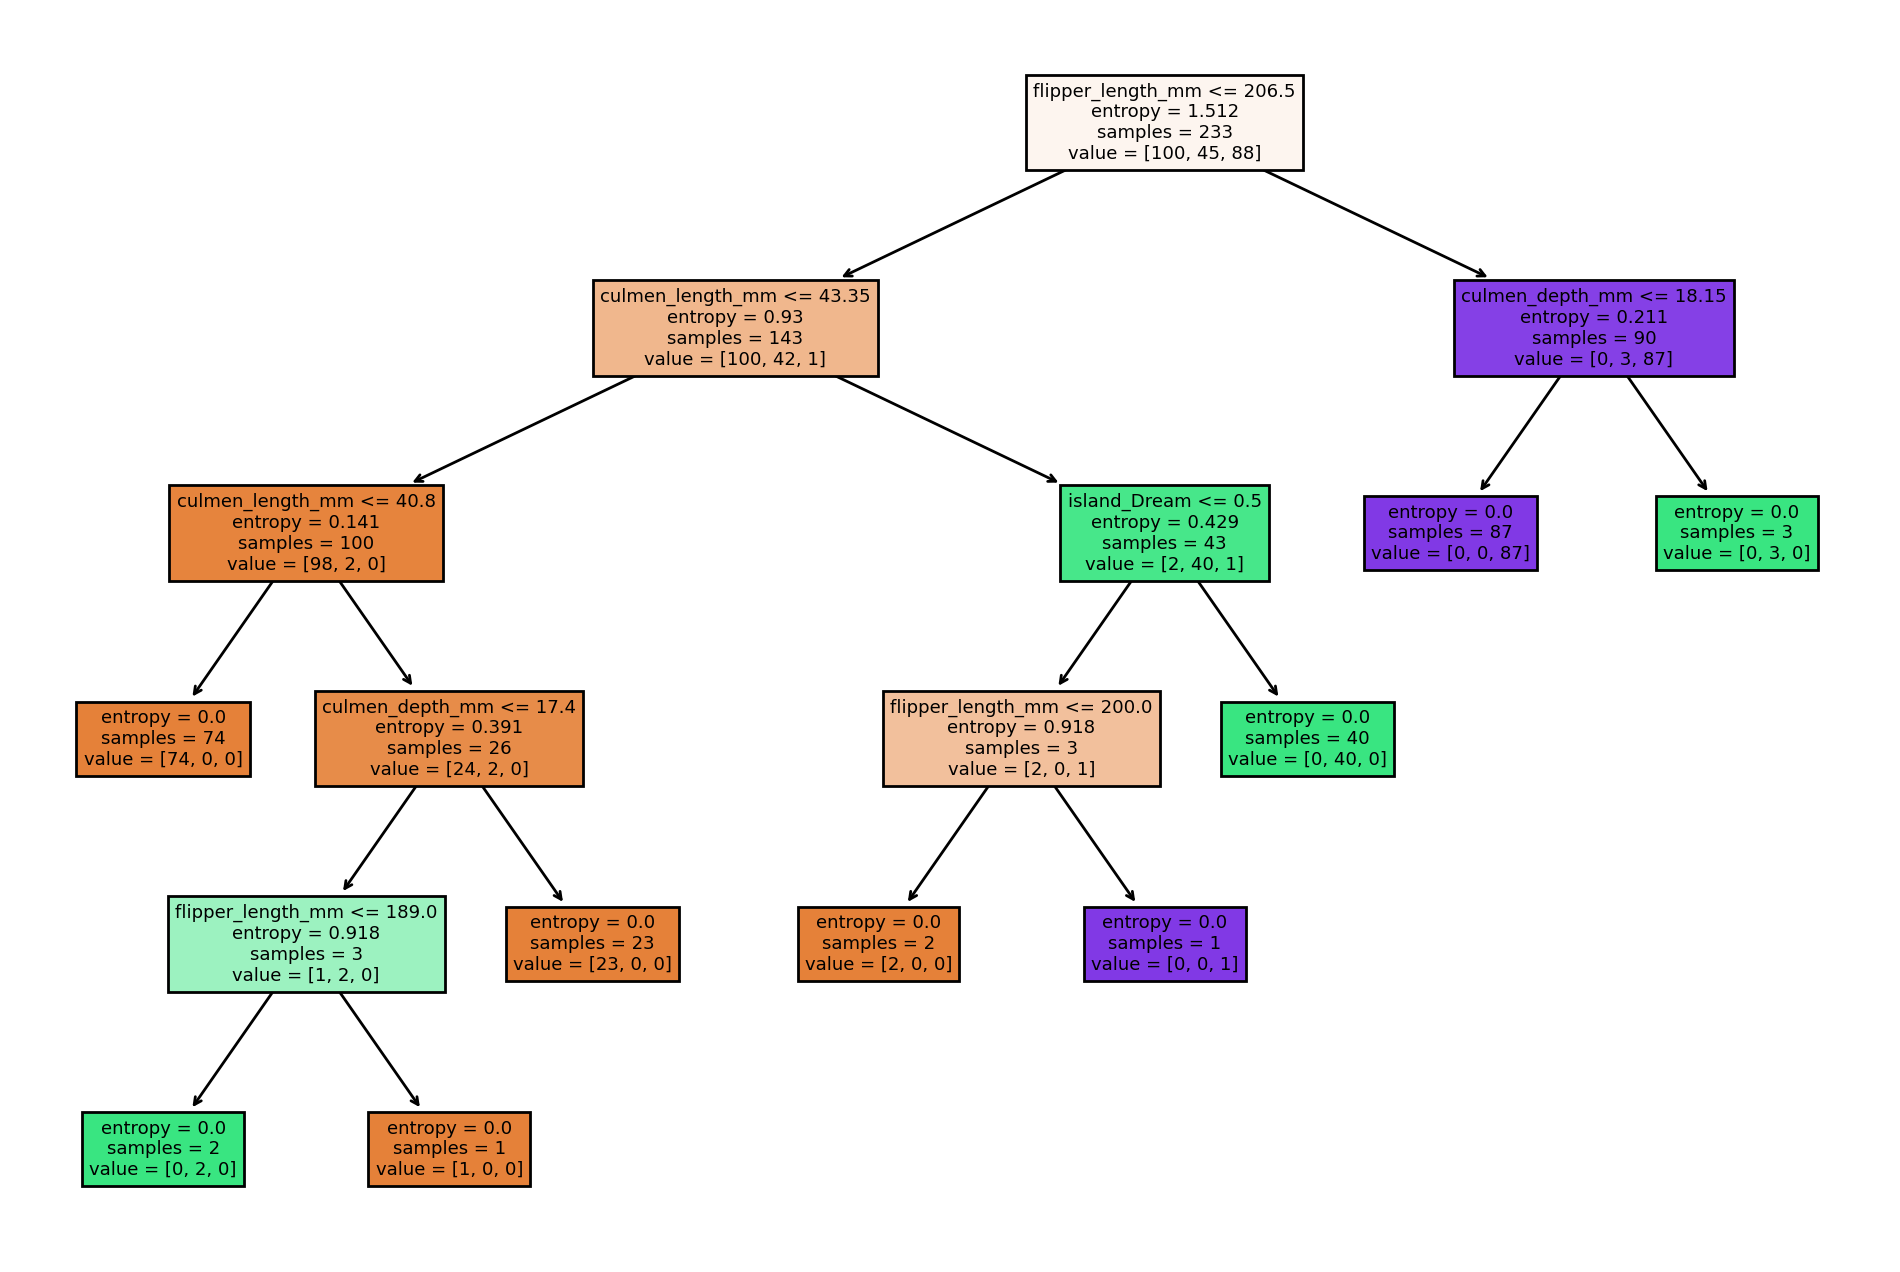

In [52]:
model_sonuc(entropi)